# Exploratory Data Analysis
## Basic Analytics (Descriptive Analytics)
Correlation analysis
* Finding relationships (correlation)
* Using correlation function 
* Using scatter matrix and other charts

## Correlation Vs. Causality
Correlation = What?
* Large sample sizes (big data)
* Hidden patterns and insights from data
* Industry & problem soving focus

Causality = Why?
* Small sample sizes
* Research projects
* Testing theories

## Correlations
* Correlation coefficients (r) 
                -1 <= r <= 1
    * -1 highly negative
    * +1 highly positive
    * 0 no relationship
    * +/- 0.3 considered meaningful
<img src="https://upload.wikimedia.org/math/e/3/c/e3c7ff025788887bba2f3dfca7df94b9.png">
<img src="https://www.biomedware.com/files/documentation/spacestat/interface/Views/correlation_example.jpg">

# Example: What variables are highly correlated with college GPA?

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.statcrunch.com/grabimageforreport.php?reportid=23859&image_id=559633")
#http://www.statcrunch.com/5.0/viewreport.php?reportid=23859

In [2]:
Image(url= "http://www.statcrunch.com/grabimageforreport.php?reportid=23859&image_id=559635")

In [3]:
Image(url= "http://www.statcrunch.com/grabimageforreport.php?reportid=23859&image_id=560638")

In [4]:
Image(url= "http://www.statcrunch.com/grabimageforreport.php?reportid=23859&image_id=560622")

# Strange Correlation

- http://tylervigen.com/spurious-correlations
- http://www.buzzfeed.com/kjh2110/the-10-most-bizarre-correlations#.gw97EyXBX

# Data description

"Sarah’s goal is to better understand how her company can succeed in the home heating oil market. She recognizes that there are many factors that influence heating oil consumption, and believes that by investigating the relationship between a number of those factors, she will be able to better monitor and respond to heating oil demand. She has selected correlation as a way to model the relationship between the factors she wishes to investigate. Correlation is a statistical measure of how strong the relationships are between attributes in a data set.

In order to investigate her question, Sarah has enlisted our help in creating a correlation matrix of six attributes. Working together, using Sarah’s employer’s data resources which are primarily drawn from the company’s billing database, we create a data set comprised of the following attributes:
- Insulation: This is a density rating, ranging from one to ten, indicating the thickness of each home’s insulation. A home with a density rating of one is poorly insulated, while a home with a density of ten has excellent insulation.
- Temperature: This is the average outdoor ambient temperature at each home for the most recent year, measure in degree Fahrenheit.
- Heating_Oil: This is the total number of units of heating oil purchased by the owner of each home in the most recent year.
- Num_Occupants: This is the total number of occupants living in each home.
- Avg_Age: This is the average age of those occupants.
- Home_Size: This is a rating, on a scale of one to eight, of the home’s overall size. The higher the number, the larger the home."

Source: Data Mining for the Masses by Matthew North

In [15]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# import Chapter04DataSet.csv
import pandas as pd

data = pd.read_csv('data/Chapter04DataSet.csv')
data.head()


,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


In [17]:
# find out data types ... missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
Insulation       1218 non-null int64
Temperature      1218 non-null int64
Heating_Oil      1218 non-null int64
Num_Occupants    1218 non-null int64
Avg_Age          1218 non-null float64
Home_Size        1218 non-null int64
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


all variables are numerical

In [18]:
# find out some descriptive statistics
data.describe()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,6.214286,65.078818,197.394089,3.113300,42.706404,4.649425
std,2.768094,16.932425,56.248267,1.690605,15.051137,2.321226
min,2.000000,38.000000,114.000000,1.000000,15.100000,1.000000
25%,4.000000,49.000000,148.250000,2.000000,29.700000,3.000000
50%,6.000000,60.000000,185.000000,3.000000,42.900000,5.000000
75%,9.000000,81.000000,253.000000,4.000000,55.600000,7.000000
max,10.000000,90.000000,301.000000,10.000000,72.200000,8.000000


correlation analysis using corr()
- Number of occupants is not significantly related with any other variables
- Insulation is positively related with heating oil, avg_age, and home_size
- Heating oil price increases, insulation usage increases …

In [19]:
# correlation analysis
data.corr()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
Insulation,1.000000,-0.793696,0.736097,-0.012567,0.642982,0.200712
Temperature,-0.793696,1.000000,-0.773660,0.012519,-0.672579,-0.213939
Heating_Oil,0.736097,-0.773660,1.000000,-0.041635,0.847891,0.381191
Num_Occupants,-0.012567,0.012519,-0.041635,1.000000,-0.048034,-0.022534
Avg_Age,0.642982,-0.672579,0.847891,-0.048034,1.000000,0.306557
Home_Size,0.200712,-0.213939,0.381191,-0.022534,0.306557,1.000000


# Plotting a large correlation matrix
- http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
- http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html

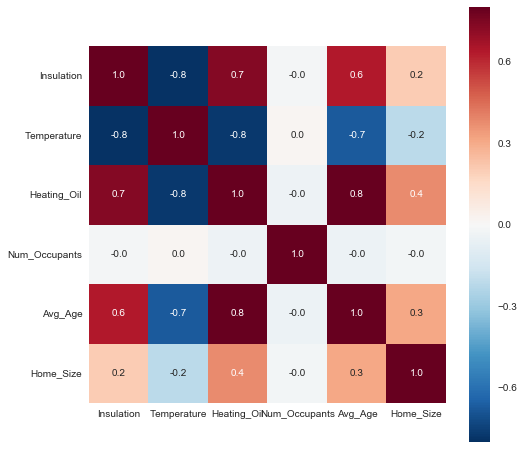

In [20]:
# correlation plot ... with the release of a new version of seaborn, functions and codes have been changed. 

plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), vmax=.8, square=True, annot=True, fmt=".1f")

**Negative** relationship with heating oil:
* Temperature

**Positive** relationship with heating oil:
* insulation
* average age
* Home size

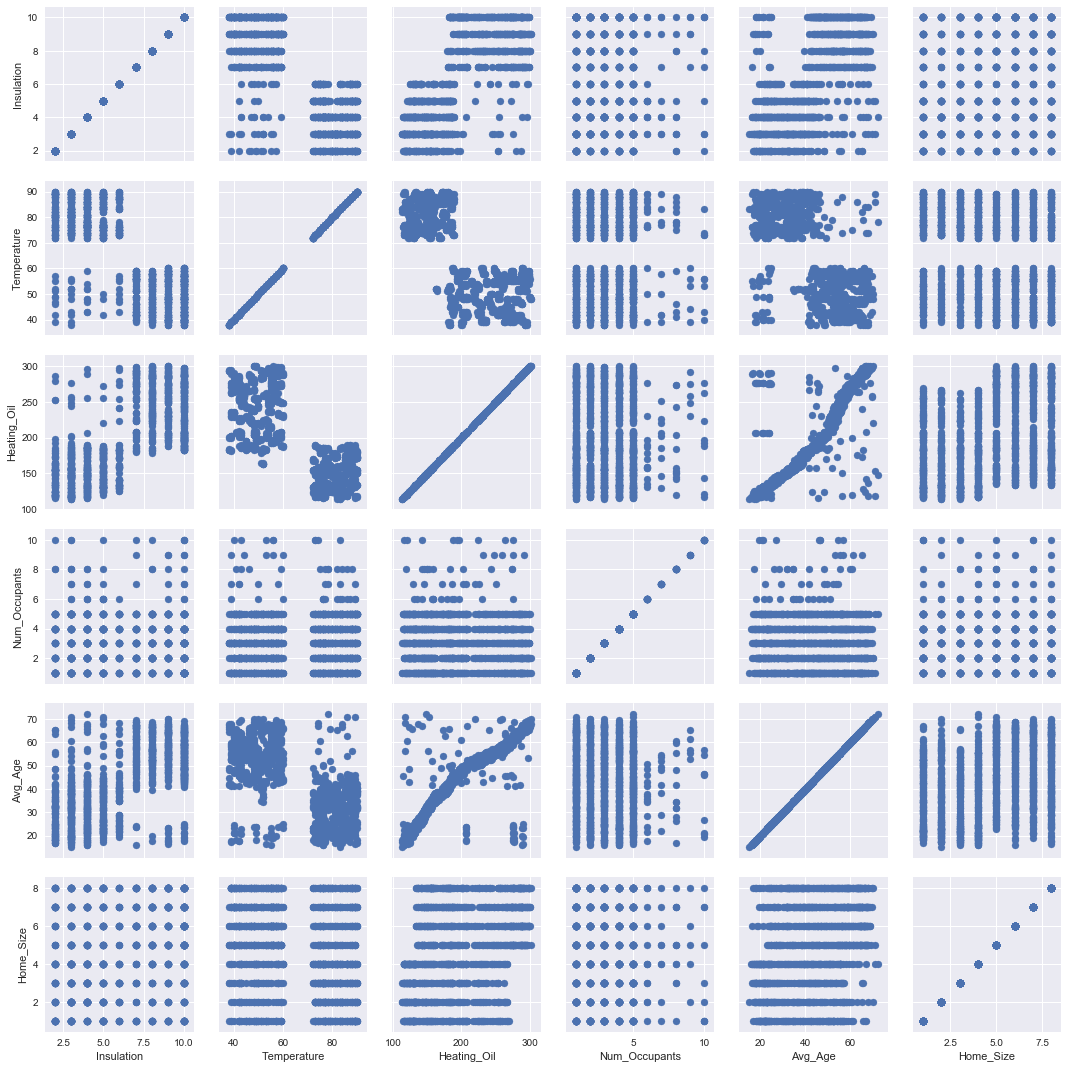

In [33]:
# plot PairGrid ... ... with the release of a new version of seaborn, functions and codes have been changed. 

g = sns.PairGrid(data)
g.map(plt.scatter)

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.linearmodels import corrplot,symmatplot

In [42]:
plt.figure(figsize=(8,8))
sns.corrplot(data)

AttributeError: 'module' object has no attribute 'corrplot'

AttributeError: 'module' object has no attribute 'kdeplot'

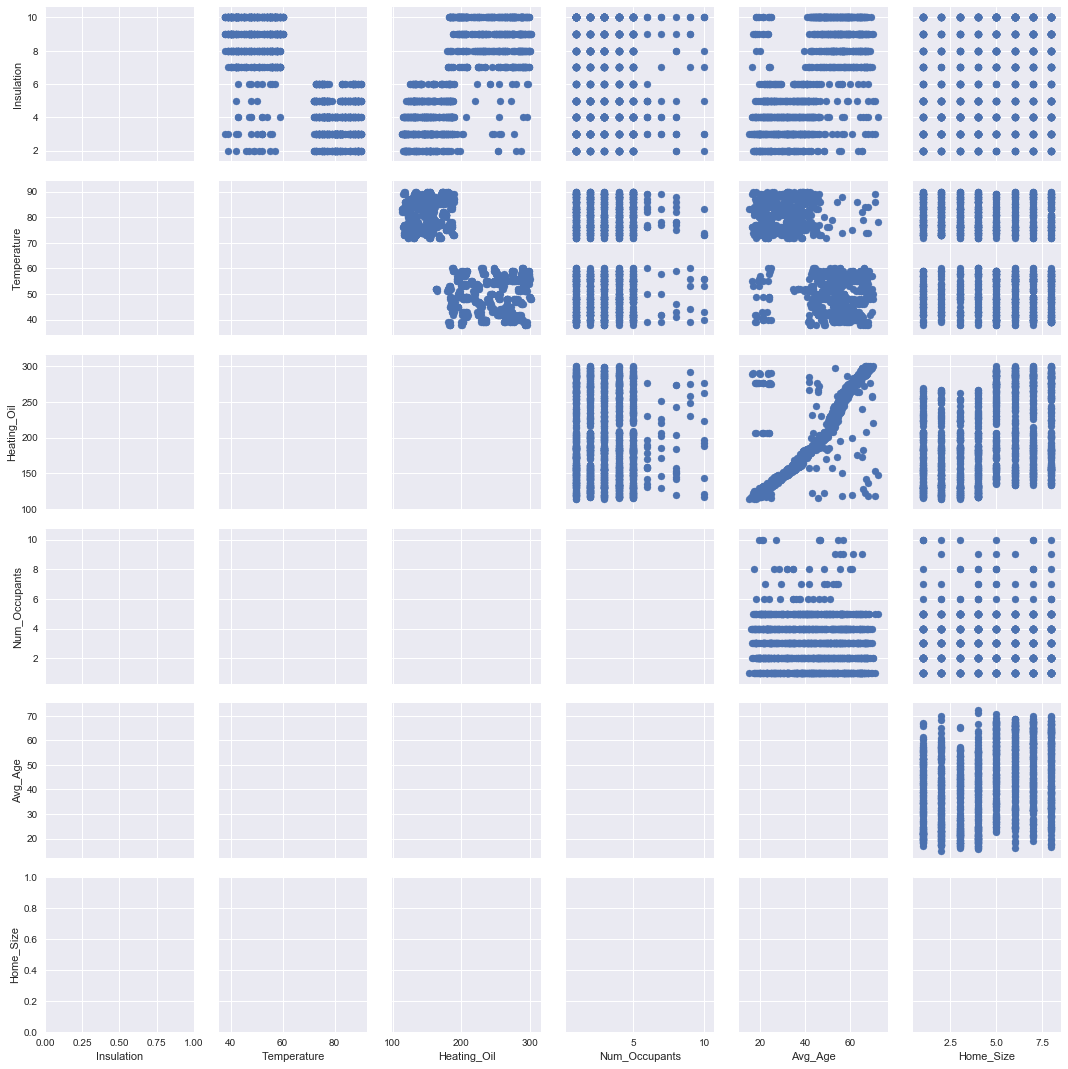

In [46]:
g = sns.PairGrid(data)
g.map_upper(plt.scatter)
g.map_lower(plt.kdeplot, cmap = "Blue_d")
g.map_diag(plt.kdeplot, lw=3, legend = False)

In [ ]:
# find out correlation of two columns: Insulation, Avg_Age
data[['Insulation','Avg_Age']].corr()

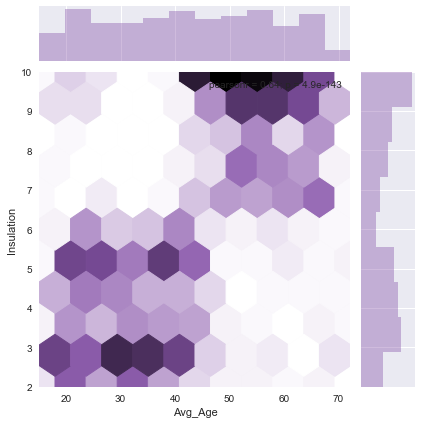

In [23]:
# jointplott for Insulation and Avg_Age
sns.jointplot("Avg_Age", "Insulation", data, kind="hex", color="#8855AA")

In [26]:
# find out correlation of two columns: Heating_Oil, Avg_Age
data[['Heating_Oil','Avg_Age']].corr()

,Heating_Oil,Avg_Age
Heating_Oil,1.000000,0.847891
Avg_Age,0.847891,1.000000


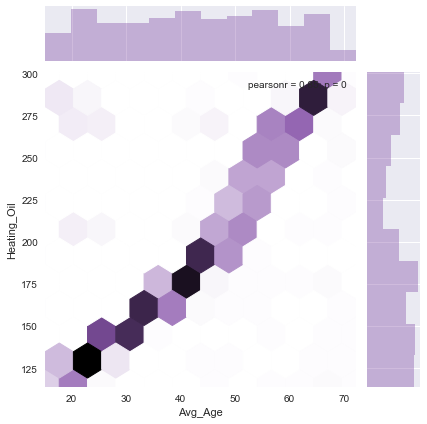

In [27]:
# jointplott for Heating_Oil and Avg_Age
sns.jointplot("Avg_Age", "Heating_Oil", data, kind="hex", color="#8855AA")

## Variance
- A nice introduction of variance and standard deviation http://www.mathsisfun.com/data/standard-deviation.html
- variance measures how the data are spread out. 
- **Variance** is the **average of the squared differences of the values and the mean**
- **Standard deviation** is the **square root of variance**
- Consider a dataset containing the following values: 10, 10, 10, 10, 10, 10. Then, variance is **zero**.
- Another dataset: 10, 5, 1, 50, 1000. Then, variance is **193,838**. Standard deviation is **440**. 

<img src = "images/variation.png">

In [47]:
# find out variance
data.var()

Insulation          7.662343
Temperature       286.707012
Heating_Oil      3163.867574
Num_Occupants       2.858147
Avg_Age           226.536721
Home_Size           5.388089
dtype: float64

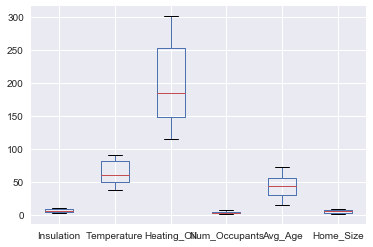

In [48]:
# boxplot
data.boxplot()